In [397]:
## Libraries

In [361]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.utils import check_random_state
from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import train_test_split

In [362]:
%run SVR_LS_Library.ipynb

In [363]:
def mape_score(y_real, y_predict):
    return np.mean(np.abs((y_real - y_predict)/y_real))*100

In [364]:
### Boston

In [365]:
### Load data

In [366]:
rng = check_random_state(0)
boston = load_boston()
perm = rng.permutation(boston.target.size)
boston.data = boston.data[perm]
boston.target = boston.target[perm]

Y = boston.target
X = boston.data

In [367]:
#split
x_train1, x_test1, y_train1, y_test1 = train_test_split(X, Y, test_size=0.2, random_state = 5)

#normalize
scaler = MaxAbsScaler().fit(x_train1)
X_train = scaler.transform(x_train1); X_test = scaler.transform(x_test1)

scaler1 = MaxAbsScaler().fit(y_train1.reshape(-1, 1))
y_train = scaler1.transform(y_train1.reshape(-1, 1)).reshape(-1)
y_test = scaler1.transform(y_test1.reshape(-1, 1)).reshape(-1)

In [250]:
model = SVR_ls(C = 100000, kernel = "linear").fit(X_train, y_train)

In [251]:
predict = model.predict(X_train)
forecast = model.predict(X_test)

In [252]:
mapscortrain = mape_score(y_train, predict)
mapscortest = mape_score(y_test, forecast)
print(f"train score: {mapscortrain:.3},\n test score: {mapscortest:.3}")

train score: 15.0,
 test score: 13.6


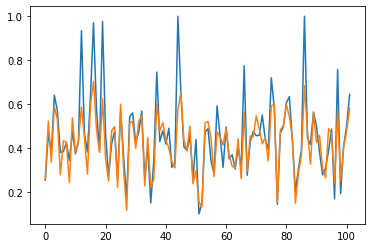

In [253]:
plt.plot(y_test)
plt.plot(forecast)

In [268]:
## Boston + genetic transformator

In [349]:
### Load data

In [350]:
rng = check_random_state(0)
boston = load_boston()
perm = rng.permutation(boston.target.size)
boston.data = boston.data[perm]
boston.target = boston.target[perm]

Y = boston.target
X_new = pd.read_csv("new_boston.csv").to_numpy()

In [351]:
#split
x_train1, x_test1, y_train1, y_test1 = train_test_split(X_new, Y, test_size=0.2, random_state = 5)

#normalize
scaler = MaxAbsScaler().fit(x_train1)
X_train = scaler.transform(x_train1); X_test = scaler.transform(x_test1)

scaler1 = MaxAbsScaler().fit(y_train1.reshape(-1, 1))
y_train = scaler1.transform(y_train1.reshape(-1, 1)).reshape(-1)
y_test = scaler1.transform(y_test1.reshape(-1, 1)).reshape(-1)

In [352]:
## fit

In [393]:
model = SVR_ls(C = 10, kernel = "rbf", gamma = 1).fit(X_train, y_train)

In [394]:
## Predict

In [395]:
predict = model.predict(X_train)
forecast = model.predict(X_test)

In [396]:
mapscortrain = mape_score(y_train, predict)
mapscortest = mape_score(y_test, forecast)
print(f"train score: {mapscortrain:.3},\n test score: {mapscortest:.3}")

train score: 6.8,
 test score: 9.27


In [376]:
mapscortrain = mape_score(y_train, predict)
mapscortest = mape_score(y_test, forecast)
print(f"train score: {mapscortrain:.3},\n test score: {mapscortest:.3}")

train score: 6.71,
 test score: 9.29


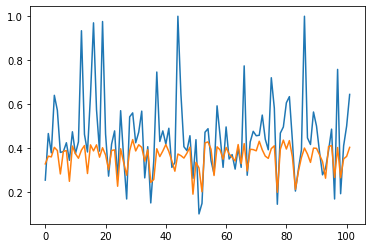

In [276]:
plt.plot(y_test)
plt.plot(forecast)

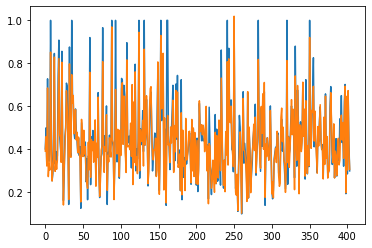

In [186]:
plt.plot(y_train)
plt.plot(predict)